In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Preprocessing-I**

In [ ]:
import pandas as pd
data =pd.read_csv('/content/drive/MyDrive/US_weather_events/WeatherEvents_Jan2016-Dec2020.csv')
#data=data.head(5000)

In [ ]:
data.isna().sum()
data = data.fillna(data.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
table_1 = data.groupby(['City','Type']).count()
table_1 = table_1.reset_index()
table_1

,City,Type,EventId,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,County,State,ZipCode
0,Abbeville,Cold,27,27,27,27,27,27,27,27,27,27,27
1,Abbeville,Fog,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137
2,Abbeville,Precipitation,76,76,76,76,76,76,76,76,76,76,76
3,Abbeville,Rain,2879,2879,2879,2879,2879,2879,2879,2879,2879,2879,2879
4,Abbeville,Snow,9,9,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842,Zionsville,Fog,646,646,646,646,646,646,646,646,646,646,646
9843,Zionsville,Precipitation,49,49,49,49,49,49,49,49,49,49,49
9844,Zionsville,Rain,3045,3045,3045,3045,3045,3045,3045,3045,3045,3045,3045
9845,Zionsville,Snow,605,605,605,605,605,605,605,605,605,605,605


In [ ]:
list_of_dic = []
label = table_1.City[0]
list_val = {}
for index,row in table_1.iterrows():   
    if row['City'] != label:
        label = row['City']
        list_of_dic.append(list_val)
        list_val = {}
        list_val['City'] = row['City']
        list_val[row['Type']] = row['EventId']
       
    else:
        list_val['City'] = row['City']
        list_val[row['Type']] = row['EventId']

In [ ]:
df = pd.DataFrame()
for dic in list_of_dic:
    df = df.append(dic, ignore_index=True)
df = df.fillna(0)

In [ ]:
data = data.merge(df,on = 'City')
data

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,Cold,Fog,Precipitation,Rain,Snow,Storm,Hail
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6258058,W-6273796,Cold,Severe,2020-12-08 16:55:00,2020-12-08 20:15:00,US/Mountain,KARL,41.6000,-106.2100,Rock River,Carbon,WY,82083.0,207.0,298.0,12.0,487.0,735.0,643.0,0.0
6258059,W-6273797,Cold,Severe,2020-12-09 15:35:00,2020-12-09 23:15:00,US/Mountain,KARL,41.6000,-106.2100,Rock River,Carbon,WY,82083.0,207.0,298.0,12.0,487.0,735.0,643.0,0.0
6258060,W-6273798,Cold,Severe,2020-12-10 01:35:00,2020-12-10 02:15:00,US/Mountain,KARL,41.6000,-106.2100,Rock River,Carbon,WY,82083.0,207.0,298.0,12.0,487.0,735.0,643.0,0.0
6258061,W-6273799,Cold,Severe,2020-12-10 02:35:00,2020-12-10 03:55:00,US/Mountain,KARL,41.6000,-106.2100,Rock River,Carbon,WY,82083.0,207.0,298.0,12.0,487.0,735.0,643.0,0.0


In [ ]:
data['StartTime(UTC)'] = pd.to_datetime(data['StartTime(UTC)'])
data['EndTime(UTC)'] = pd.to_datetime(data['EndTime(UTC)'])

data['Start_year'] = data['StartTime(UTC)'].dt.year
data['Start_month'] = data['StartTime(UTC)'].dt.month
data['Start_week'] = data['StartTime(UTC)'].dt.week
data['Start_weekday'] = data['StartTime(UTC)'].dt.weekday
data['Start_day'] = data['StartTime(UTC)'].dt.day

data['end_year'] = data['EndTime(UTC)'].dt.year
data['end_month'] = data['EndTime(UTC)'].dt.month
data['end_week'] = data['EndTime(UTC)'].dt.week
data['end_weekday'] = data['EndTime(UTC)'].dt.weekday
data['end_day'] = data['EndTime(UTC)'].dt.day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if sys.path[0] == '':


In [ ]:
X = data.drop(['Type','StartTime(UTC)','EndTime(UTC)'],axis = 1).head(5000)
y = data.Type.head(5000)

In [ ]:
X.head(10)

# **Data Preprocessing-II**

In [ ]:
import pandas as pd
data =pd.read_csv('/content/drive/MyDrive/US_weather_events/WeatherEvents_Jan2016-Dec2020.csv')
#data=data.head(5000)

In [ ]:
data.head(10)

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
5,W-6,Snow,Light,2016-01-08 16:14:00,2016-01-08 17:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
6,W-7,Fog,Severe,2016-01-09 12:54:00,2016-01-09 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
7,W-8,Snow,Light,2016-01-09 15:34:00,2016-01-09 16:14:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
8,W-9,Fog,Severe,2016-01-09 16:14:00,2016-01-09 16:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
9,W-10,Snow,Light,2016-01-09 16:34:00,2016-01-09 16:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [ ]:
leftover=data.loc[data['Type']!='Snow']
leftover=leftover.loc[leftover['Type']!='Cold']
leftover=leftover.loc[leftover['Type']!='Fog']
leftover=leftover.loc[leftover['Type']!='Rain']
leftover=leftover.loc[leftover['Type']!='Precipitation']
leftover=leftover.loc[leftover['Type']!='Storm']
leftover=leftover.loc[leftover['Type']!='Hail']

leftover

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode


In [ ]:
a=data.loc[data['City']=='Abbeville']
a=a.loc[a['Type']=='Rain']
print(a.count())

EventId           2879
Type              2879
Severity          2879
StartTime(UTC)    2879
EndTime(UTC)      2879
TimeZone          2879
AirportCode       2879
LocationLat       2879
LocationLng       2879
City              2879
County            2879
State             2879
ZipCode           2879
dtype: int64


In [ ]:
data.isnull().sum()
data=data.fillna(data.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
#table_1 = data.groupby(by=['City','Type'])
table_1 = data.groupby(by=['City','Type']).count()
print(table_1)

                          EventId  Severity  ...  State  ZipCode
City       Type                              ...                
Abbeville  Cold                27        27  ...     27       27
           Fog               1137      1137  ...   1137     1137
           Precipitation       76        76  ...     76       76
           Rain              2879      2879  ...   2879     2879
           Snow                 9         9  ...      9        9
...                           ...       ...  ...    ...      ...
Zionsville Fog                646       646  ...    646      646
           Precipitation       49        49  ...     49       49
           Rain              3045      3045  ...   3045     3045
           Snow               605       605  ...    605      605
           Storm                3         3  ...      3        3

[9847 rows x 11 columns]


In [ ]:
table_1 = table_1.reset_index()
table_1.head(10)

,level_0,index,City,Type,EventId,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,County,State,ZipCode
0,0,0,Abbeville,Cold,27,27,27,27,27,27,27,27,27,27,27
1,1,1,Abbeville,Fog,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137
2,2,2,Abbeville,Precipitation,76,76,76,76,76,76,76,76,76,76,76
3,3,3,Abbeville,Rain,2879,2879,2879,2879,2879,2879,2879,2879,2879,2879,2879
4,4,4,Abbeville,Snow,9,9,9,9,9,9,9,9,9,9,9
5,5,5,Abbeville,Storm,3,3,3,3,3,3,3,3,3,3,3
6,6,6,Aberdeen,Cold,991,991,991,991,991,991,991,991,991,991,991
7,7,7,Aberdeen,Fog,3618,3618,3618,3618,3618,3618,3618,3618,3618,3618,3618
8,8,8,Aberdeen,Precipitation,145,145,145,145,145,145,145,145,145,145,145
9,9,9,Aberdeen,Rain,4768,4768,4768,4768,4768,4768,4768,4768,4768,4768,4768


In [ ]:
table_1.iloc[[4]] 

,City,Type,EventId,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,County,State,ZipCode
4,Abbeville,Snow,9,9,9,9,9,9,9,9,9,9,9


In [ ]:
list_of_dic = []
label = table_1.City[0]
list_val = {}
sum=[];sum=0; i=5;
for index,row in table_1.iterrows():   
    sum=sum+1
    if sum==i:
      print('index: ',index)
      print('row: ',row)
      print()
    if row['City'] != label:
        label = row['City']
        if sum==i:
          print('label:',label)
        list_of_dic.append(list_val)
        if sum==i:
          print('list_of_dic: ',list_of_dic)
        list_val = {}
        list_val['City'] = row['City']
        if sum==i:
          print('list_val: ',list_val)
        list_val[row['Type']] = row['EventId']
        if sum==i:
          print('list_val: ',list_val)
    else:
        list_val['City'] = row['City']
        if sum==i:
          print('list_val: ',list_val)
        list_val[row['Type']] = row['EventId']
        if sum==i:
          print('list_val: ',list_val)

index:  4
row:  City              Abbeville
Type                   Snow
EventId                   9
Severity                  9
StartTime(UTC)            9
EndTime(UTC)              9
TimeZone                  9
AirportCode               9
LocationLat               9
LocationLng               9
County                    9
State                     9
ZipCode                   9
Name: 4, dtype: object

list_val:  {'City': 'Abbeville', 'Cold': 27, 'Fog': 1137, 'Precipitation': 76, 'Rain': 2879}
list_val:  {'City': 'Abbeville', 'Cold': 27, 'Fog': 1137, 'Precipitation': 76, 'Rain': 2879, 'Snow': 9}


In [ ]:
df = pd.DataFrame()
for dic in list_of_dic:
    df = df.append(dic, ignore_index=True)
df

,City,Cold,Fog,Precipitation,Rain,Snow,Storm,Hail
0,Abbeville,27.0,1137.0,76.0,2879.0,9.0,3.0,NaN
1,Aberdeen,991.0,3618.0,145.0,4768.0,779.0,40.0,NaN
2,Aberdeen Proving Ground,99.0,650.0,12.0,1735.0,84.0,1.0,6.0
3,Abilene,80.0,283.0,61.0,1314.0,69.0,18.0,4.0
4,Abingdon,10.0,394.0,48.0,3662.0,474.0,NaN,NaN
...,...,...,...,...,...,...,...,...
1710,Yukon,54.0,959.0,64.0,1287.0,114.0,30.0,NaN
1711,Yuma,48.0,148.0,3.0,202.0,NaN,2.0,NaN
1712,Zanesville,4.0,852.0,55.0,2499.0,578.0,NaN,NaN
1713,Zapata,130.0,486.0,5.0,1409.0,7.0,NaN,NaN


In [ ]:
df=df.fillna(0)
df

,City,Cold,Fog,Precipitation,Rain,Snow,Storm,Hail
0,Abbeville,27.0,1137.0,76.0,2879.0,9.0,3.0,0.0
1,Aberdeen,991.0,3618.0,145.0,4768.0,779.0,40.0,0.0
2,Aberdeen Proving Ground,99.0,650.0,12.0,1735.0,84.0,1.0,6.0
3,Abilene,80.0,283.0,61.0,1314.0,69.0,18.0,4.0
4,Abingdon,10.0,394.0,48.0,3662.0,474.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1710,Yukon,54.0,959.0,64.0,1287.0,114.0,30.0,0.0
1711,Yuma,48.0,148.0,3.0,202.0,0.0,2.0,0.0
1712,Zanesville,4.0,852.0,55.0,2499.0,578.0,0.0,0.0
1713,Zapata,130.0,486.0,5.0,1409.0,7.0,0.0,0.0


In [ ]:
data = data.merge(df,on = 'City')

In [ ]:
data

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,Cold,Fog,Precipitation,Rain,Snow,Storm,Hail
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6258058,W-6273796,Cold,Severe,2020-12-08 16:55:00,2020-12-08 20:15:00,US/Mountain,KARL,41.6000,-106.2100,Rock River,Carbon,WY,82083.0,207.0,298.0,12.0,487.0,735.0,643.0,0.0
6258059,W-6273797,Cold,Severe,2020-12-09 15:35:00,2020-12-09 23:15:00,US/Mountain,KARL,41.6000,-106.2100,Rock River,Carbon,WY,82083.0,207.0,298.0,12.0,487.0,735.0,643.0,0.0
6258060,W-6273798,Cold,Severe,2020-12-10 01:35:00,2020-12-10 02:15:00,US/Mountain,KARL,41.6000,-106.2100,Rock River,Carbon,WY,82083.0,207.0,298.0,12.0,487.0,735.0,643.0,0.0
6258061,W-6273799,Cold,Severe,2020-12-10 02:35:00,2020-12-10 03:55:00,US/Mountain,KARL,41.6000,-106.2100,Rock River,Carbon,WY,82083.0,207.0,298.0,12.0,487.0,735.0,643.0,0.0


In [ ]:
data['StartTime(UTC)'] = pd.to_datetime(data['StartTime(UTC)'])
data['EndTime(UTC)'] = pd.to_datetime(data['EndTime(UTC)'])

data['Start_year'] = data['StartTime(UTC)'].dt.year
data['Start_month'] = data['StartTime(UTC)'].dt.month
data['Start_week'] = data['StartTime(UTC)'].dt.week
data['Start_weekday'] = data['StartTime(UTC)'].dt.weekday
data['Start_day'] = data['StartTime(UTC)'].dt.day

data['end_year'] = data['EndTime(UTC)'].dt.year
data['end_month'] = data['EndTime(UTC)'].dt.month
data['end_week'] = data['EndTime(UTC)'].dt.week
data['end_weekday'] = data['EndTime(UTC)'].dt.weekday
data['end_day'] = data['EndTime(UTC)'].dt.day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if sys.path[0] == '':


In [ ]:
data.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,Cold,Fog,Precipitation,Rain,Snow,Storm,Hail,Start_year,Start_month,Start_week,Start_weekday,Start_day,end_year,end_month,end_week,end_weekday,end_day
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0,2016,1,1,2,6,2016,1,1,3,7
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0,2016,1,1,3,7,2016,1,1,3,7
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0,2016,1,1,3,7,2016,1,1,3,7
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0,2016,1,1,4,8,2016,1,1,4,8
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,20.0,67.0,6.0,1152.0,670.0,57.0,0.0,2016,1,1,4,8,2016,1,1,4,8


In [ ]:
X = data.drop(['Type','StartTime(UTC)','EndTime(UTC)'],axis = 1)
y = data.Type

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for name in X.columns:
    if X[name].dtypes == "O":
        print(name)
        X[name] = X[name].astype(str)
        le.fit(X[name])
        X[name] = le.transform(X[name])

EventId
Severity
TimeZone
AirportCode
City
County
State


# **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train

,EventId,Severity,TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,Cold,Fog,Precipitation,Rain,Snow,Storm,Hail,Start_year,Start_month,Start_week,Start_weekday,Start_day,end_year,end_month,end_week,end_weekday,end_day
1711872,365112,1,2,107,35.0417,-106.6147,20,86,29,87106.0,48.0,87.0,11.0,870.0,141.0,41.0,11.0,2020,3,12,3,19,2020,3,12,3,19
4479056,3332414,4,0,1465,41.4480,-97.3426,310,778,26,68601.0,64.0,436.0,58.0,1070.0,378.0,34.0,0.0,2020,7,29,3,16,2020,7,29,3,16
350313,3911664,1,3,1546,45.5958,-122.6092,1259,675,34,97218.0,14.0,950.0,35.0,4646.0,879.0,3.0,25.0,2018,4,15,3,12,2018,4,15,3,12
538763,5056246,1,1,667,36.6869,-77.4828,466,406,42,23847.0,923.0,1034.0,204.0,3575.0,302.0,9.0,0.0,2020,12,49,5,5,2020,12,49,5,5
1303344,573964,1,0,108,45.4436,-98.4138,1,122,38,57401.0,991.0,3618.0,145.0,4768.0,779.0,40.0,0.0,2019,3,10,6,10,2019,3,10,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570006,215147,2,2,1792,34.5184,-109.3801,1356,29,2,85936.0,3.0,148.0,6.0,697.0,262.0,27.0,0.0,2016,4,15,1,12,2016,4,15,1,12
2234489,866591,4,1,1583,35.1753,-79.0077,1246,260,24,28308.0,83.0,426.0,41.0,4566.0,18.0,18.0,3.0,2016,9,37,6,18,2016,9,37,6,18
4926484,3913805,4,0,1765,38.9297,-90.4300,1256,916,21,63373.0,26.0,764.0,44.0,1655.0,169.0,4.0,0.0,2016,8,35,0,29,2016,8,35,0,29
4304572,4759009,2,0,1410,32.5521,-88.5556,976,555,22,39309.0,66.0,1188.0,210.0,5330.0,56.0,6.0,3.0,2017,7,28,1,11,2017,7,28,1,11


# **Model Testing**

###Analyzing the Importance of each feature

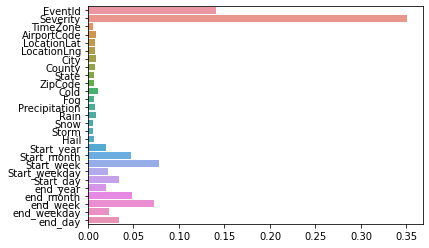

In [ ]:
import seaborn as sns
ax = sns.barplot(x=clf.feature_importances_, y=X.columns)

###Features Used 

In [ ]:
le = preprocessing.LabelEncoder()
for name in X.columns:
    if X[name].dtypes == "O":
        print(name)
        X[name] = X[name].astype(str)
        le.fit(X[name])
        X[name] = le.transform(X[name])

EventId
Severity
TimeZone
AirportCode
City
County
State


###Importing All necessary libraries

In [ ]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

###Random Forest Classifier

In [ ]:
clf = RandomForestClassifier(n_estimators = 400,min_samples_split = 2,min_samples_leaf = 1,max_features= 'sqrt',max_depth =None,bootstrap= False)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

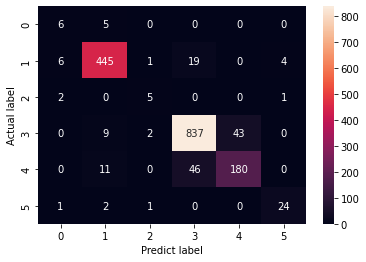

               precision    recall  f1-score   support

         Cold       0.40      0.55      0.46        11
          Fog       0.94      0.94      0.94       475
Precipitation       0.56      0.62      0.59         8
         Rain       0.93      0.94      0.93       891
         Snow       0.81      0.76      0.78       237
        Storm       0.83      0.86      0.84        28

     accuracy                           0.91      1650
    macro avg       0.74      0.78      0.76      1650
 weighted avg       0.91      0.91      0.91      1650

90.72727272727272


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
cm=confusion_matrix(predictions,y_test) 

sns.heatmap(cm, annot=True, fmt="d");
    
plt.ylabel('Actual label');
plt.xlabel('Predict label');   
plt.show()


print(classification_report(predictions,y_test))  
print(accuracy_score(predictions,y_test) * 100)


###Decision Tree Classifier

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

####A complex Tree

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf, ax= ax, feature_names = X_train.columns, 
               class_names=clf.classes_, filled = True, 
               proportion = True, rounded=True)

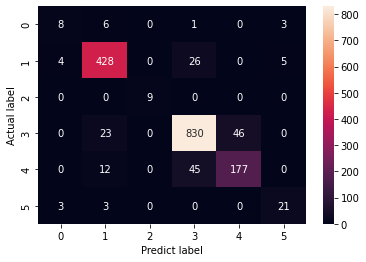

               precision    recall  f1-score   support

         Cold       0.53      0.44      0.48        18
          Fog       0.91      0.92      0.92       463
Precipitation       1.00      1.00      1.00         9
         Rain       0.92      0.92      0.92       899
         Snow       0.79      0.76      0.77       234
        Storm       0.72      0.78      0.75        27

     accuracy                           0.89      1650
    macro avg       0.81      0.80      0.81      1650
 weighted avg       0.89      0.89      0.89      1650

89.27272727272727


In [ ]:
cm=confusion_matrix(predictions,y_test) 
sns.heatmap(cm, annot=True, fmt="d");
    
plt.ylabel('Actual label');
plt.xlabel('Predict label');   
plt.show()


print(classification_report(predictions,y_test))  
print(accuracy_score(predictions,y_test) * 100)

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

model = LogisticRegression()
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


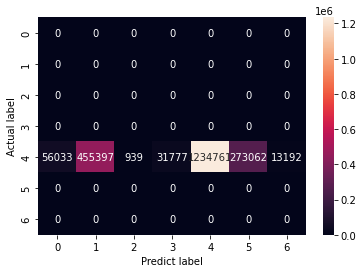

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

         Cold       0.00      0.00      0.00         0
          Fog       0.00      0.00      0.00         0
         Hail       0.00      0.00      0.00         0
Precipitation       0.00      0.00      0.00         0
         Rain       1.00      0.60      0.75   2065161
         Snow       0.00      0.00      0.00         0
        Storm       0.00      0.00      0.00         0

     accuracy                           0.60   2065161
    macro avg       0.14      0.09      0.11   2065161
 weighted avg       1.00      0.60      0.75   2065161

59.79005995174226


In [ ]:
cm=confusion_matrix(predictions,y_test) 
sns.heatmap(cm, annot=True, fmt="d");
    
plt.ylabel('Actual label');
plt.xlabel('Predict label');   
plt.show()


print(classification_report(predictions,y_test))  
print(accuracy_score(predictions,y_test) * 100)

###K Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [ ]:
cm=confusion_matrix(predictions,y_test) 
sns.heatmap(cm, annot=True, fmt="d");
    
plt.ylabel('Actual label');
plt.xlabel('Predict label');   
plt.show()

print(classification_report(predictions,y_test))  
print(accuracy_score(predictions,y_test) * 100)

###SVM SVC Classifier

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

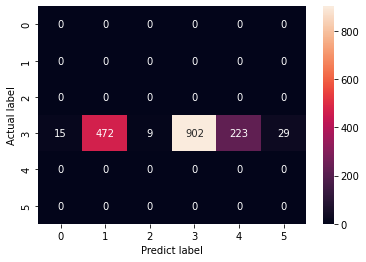

               precision    recall  f1-score   support

         Cold       0.00      0.00      0.00         0
          Fog       0.00      0.00      0.00         0
Precipitation       0.00      0.00      0.00         0
         Rain       1.00      0.55      0.71      1650
         Snow       0.00      0.00      0.00         0
        Storm       0.00      0.00      0.00         0

     accuracy                           0.55      1650
    macro avg       0.17      0.09      0.12      1650
 weighted avg       1.00      0.55      0.71      1650

54.666666666666664


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm=confusion_matrix(predictions,y_test) 
sns.heatmap(cm, annot=True, fmt="d");
    
plt.ylabel('Actual label');
plt.xlabel('Predict label');   
plt.show()


print(classification_report(predictions,y_test))  
print(accuracy_score(predictions,y_test) * 100)

###SVM Linear SVC Classifiers

In [ ]:
from sklearn import svm

clf = svm.LinearSVC()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [ ]:
cm=confusion_matrix(predictions,y_test) 
sns.heatmap(cm, annot=True, fmt="d")

plt.ylabel('Actual label')
plt.xlabel('Predict label')  
plt.show()
print(classification_report(predictions,y_test))  
print(accuracy_score(predictions,y_test) * 100)